<h1 style="font-size: 50px; color: #000000;">
Retail Sales Data Analysis</h1>

<h1 style="font-size: 40px; color: #000000;">Introduction</h1>

<h1 style="font-size: 15px; color: #000000;">
In today's competitive retail environment, understanding sales performance and customer behavior is crucial for making informed business decisions. 
This project analyzes retail sales data to uncover trends, identify top-performing products and channels, and evaluate the impact of discounts on sales.The dataset includes various attributes related to orders, such as order date, sales channel, product details, and financial metrics. 
Through comprehensive exploratory data analysis (EDA), we aim to provide actionable insights that can drive business strategies and improve overall performance.</h1>

<h1 style="font-size: 30px; color: #000000;">Data Cleaning and Preparation
</h1>

In [2]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('sales_data.csv')

In [4]:
pd.DataFrame(data)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,9/26/2020,12/30/2020,1/7/2021,1/14/2021,USD,9,41,339,29,1,0.075,234.5,121.940
7987,SO - 0008088,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/2/2021,1/4/2021,USD,14,29,202,3,6,0.050,3202.6,1921.560
7988,SO - 0008089,Online,WARE-UHY1004,9/26/2020,12/30/2020,1/23/2021,1/26/2021,USD,14,32,241,35,5,0.200,3825.7,2792.761
7989,SO - 0008090,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/20/2021,1/25/2021,USD,20,42,112,36,8,0.100,1072.0,804.000


In [5]:
data.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Price', 'Unit Cost'],
      dtype='object')

In [6]:
data.columns = data.columns.map(lambda col_name: col_name.replace(' ', '_').lstrip('_'))

In [7]:
data.columns

Index(['OrderNumber', 'Sales_Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', 'SalesTeamID',
       'CustomerID', 'StoreID', 'ProductID', 'Order_Quantity',
       'Discount_Applied', 'Unit_Price', 'Unit_Cost'],
      dtype='object')

In [8]:
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [9]:
data.isnull().sum()

OrderNumber         0
Sales_Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
SalesTeamID         0
CustomerID          0
StoreID             0
ProductID           0
Order_Quantity      0
Discount_Applied    0
Unit_Price          0
Unit_Cost           0
dtype: int64

In [10]:
data.dtypes

OrderNumber          object
Sales_Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
SalesTeamID           int64
CustomerID            int64
StoreID               int64
ProductID             int64
Order_Quantity        int64
Discount_Applied    float64
Unit_Price          float64
Unit_Cost           float64
dtype: object

In [11]:
date_columns = ["ProcuredDate","OrderDate","ShipDate","DeliveryDate"]

for i in date_columns:
    data[i]=pd.to_datetime(data[i])

In [12]:
data['Delivery_Time(Days)']=(data['DeliveryDate']-data['OrderDate']).dt.days
data['Total_Order_Value']=(data['Order_Quantity']*data['Unit_Price']*(1-data['Discount_Applied']))
data['Total_Cost']=data['Order_Quantity']*data['Unit_Cost']
data['Profit']=data['Total_Order_Value']-data['Total_Cost']

In [13]:
data.dtypes

OrderNumber                    object
Sales_Channel                  object
WarehouseCode                  object
ProcuredDate           datetime64[ns]
OrderDate              datetime64[ns]
ShipDate               datetime64[ns]
DeliveryDate           datetime64[ns]
CurrencyCode                   object
SalesTeamID                     int64
CustomerID                      int64
StoreID                         int64
ProductID                       int64
Order_Quantity                  int64
Discount_Applied              float64
Unit_Price                    float64
Unit_Cost                     float64
Delivery_Time(Days)             int64
Total_Order_Value             float64
Total_Cost                    float64
Profit                        float64
dtype: object

In [14]:
data.shape

(7991, 20)

<h1 style="font-size: 40px; color: #000000;">
Exploratory Data Analysis (EDA)</h1>

In [15]:
data.describe(include='all')

,OrderNumber,Sales_Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Delivery_Time(Days),Total_Order_Value,Total_Cost,Profit
count,7991,7991,7991,7991,7991,7991,7991,7991,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
unique,7991,4,6,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SO - 000101,In-Store,WARE-NMK1003,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3298,2505,NaN,NaN,NaN,NaN,7991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2019-05-29 05:11:01.794518784,2019-09-15 11:01:09.828557312,2019-09-30 15:04:26.249530624,2019-10-06 03:10:06.832686592,NaN,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911054,20.672882,9153.219840,6484.551694,2668.668146
min,NaN,NaN,NaN,2017-12-31 00:00:00,2018-05-31 00:00:00,2018-06-02 00:00:00,2018-06-07 00:00:00,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000,3.000000,100.500000,73.700000,-12167.200000
25%,NaN,NaN,NaN,2018-10-27 00:00:00,2019-01-16 12:00:00,2019-01-31 00:00:00,2019-02-06 00:00:00,NaN,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.115500,14.000000,2813.832500,1833.924000,498.078000
50%,NaN,NaN,NaN,2019-05-15 00:00:00,2019-09-15 00:00:00,2019-09-30 00:00:00,2019-10-05 00:00:00,NaN,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000,21.000000,6127.820000,4205.992000,1544.283000
75%,NaN,NaN,NaN,2020-03-10 00:00:00,2020-05-12 00:00:00,2020-05-28 00:00:00,2020-06-01 00:00:00,NaN,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250500,27.000000,12831.840000,8975.856000,3522.860000
max,NaN,NaN,NaN,2020-09-26 00:00:00,2020-12-30 00:00:00,2021-01-24 00:00:00,2021-02-02 00:00:00,NaN,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000,38.000000,49697.920000,42308.088000,26384.600000


<h1 style="font-size: 30px; color: #000000;">Customer Behavior Analysis</h1>

<h1 style="font-size: 25px; color: #000000;">Customer Order Frequency</h1>

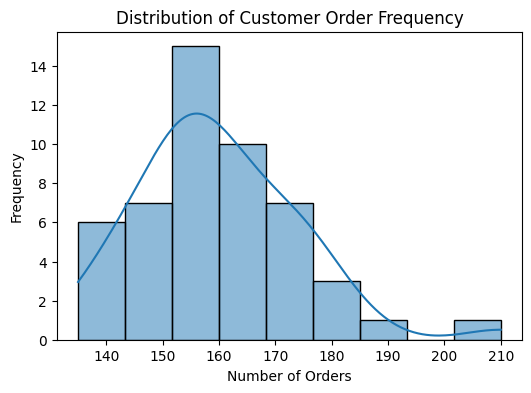

In [16]:
customer_orders = data['CustomerID'].value_counts().reset_index()
customer_orders.columns = ['CustomerID', 'Order_Count']

plt.figure(figsize=(6,4))
sns.histplot(customer_orders['Order_Count'], kde=True)
plt.title('Distribution of Customer Order Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()


<h1 style="font-size: 15px; color: #000000;">The histogram shows that most customers (around 80%) place between 140 and 160 orders. There are fewer customers who place very few orders (less than 140) or a very high number of orders (more than 180)</h1>

<h1 style="font-size: 25px; color: #000000;">Customer Profitability Analysis</h1>

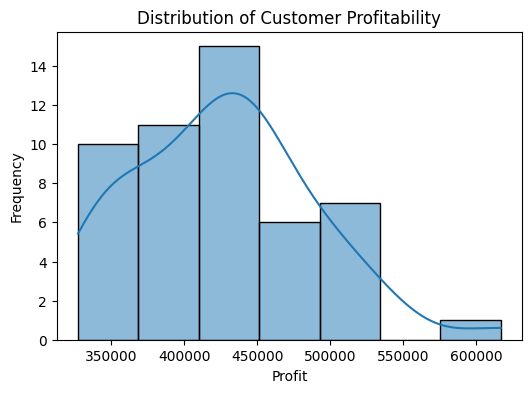

In [17]:
customer_profit = data.groupby('CustomerID')['Profit'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.histplot(customer_profit['Profit'], kde=True)
plt.title('Distribution of Customer Profitability')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


<h1 style="font-size: 15px; color: #000000;">"Customer Profitability" distribution leans left, indicating more customers with lower profitability (potentially losses). While a smaller group shows high profitability, the bulk falls within a wider range of lower profitability. This suggests a need to explore customer segments and target high-profit areas for better resource allocation.</h1>

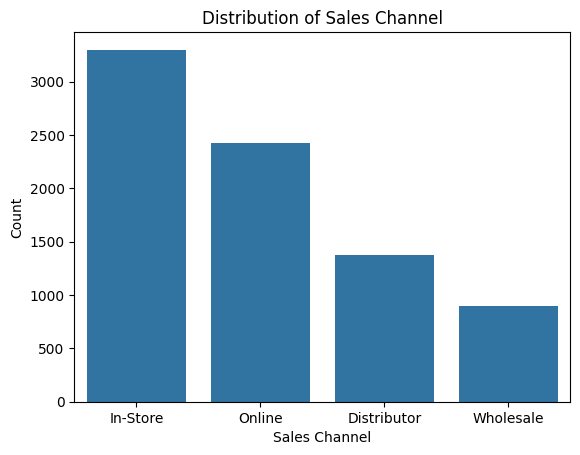

In [18]:
sns.countplot(data=data,x='Sales_Channel')
plt.title('Distribution of Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

<h1 style="font-size: 30px; color: #000000;">Time Series Analysis</h1>

<h1 style="font-size: 25px; color: #000000;">Monthly Trends in Order Quantity</h1>

In [19]:
data['OrderMonthYear'] = data['OrderDate'].dt.strftime('%Y-%m')

monthly_order_quantity = data.groupby('OrderMonthYear')['Order_Quantity'].sum().reset_index()
monthly_order_quantity

,OrderMonthYear,Order_Quantity
0,2018-05,39
1,2018-06,1112
2,2018-07,1211
3,2018-08,1266
4,2018-09,1228
5,2018-10,1072
6,2018-11,1167
7,2018-12,1387
8,2019-01,1297
9,2019-02,1014


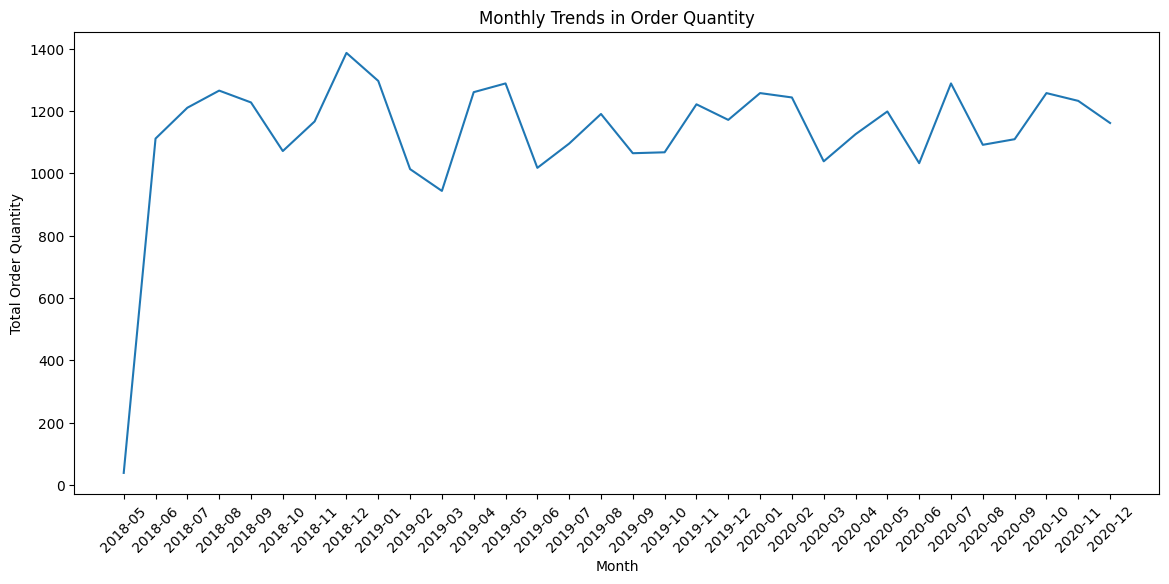

In [20]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='OrderMonthYear', y='Order_Quantity', data=monthly_order_quantity)
plt.title('Monthly Trends in Order Quantity')
plt.xlabel('Month')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.show()


<h1 style="font-size: 15px; color: #000000;">"Order Quantity" graph shows fluctuations over 2.5 years (May 2018 - Dec 2020). Fall/winter (Oct-Feb) appears busier with potentially higher order volumes compared to spring/summer.</h1>

<h1 style="font-size: 25px; color: #000000;">Average Delivery Time Over Time</h1>

In [21]:
monthly_avg_delivery_time = data.groupby('OrderMonthYear')['Delivery_Time(Days)'].mean().reset_index()
monthly_avg_delivery_time

,OrderMonthYear,Delivery_Time(Days)
0,2018-05,21.625000
1,2018-06,20.809524
2,2018-07,21.302682
3,2018-08,20.795699
4,2018-09,19.948819
5,2018-10,20.750000
6,2018-11,21.027237
7,2018-12,21.501684
8,2019-01,20.641638
9,2019-02,20.728448


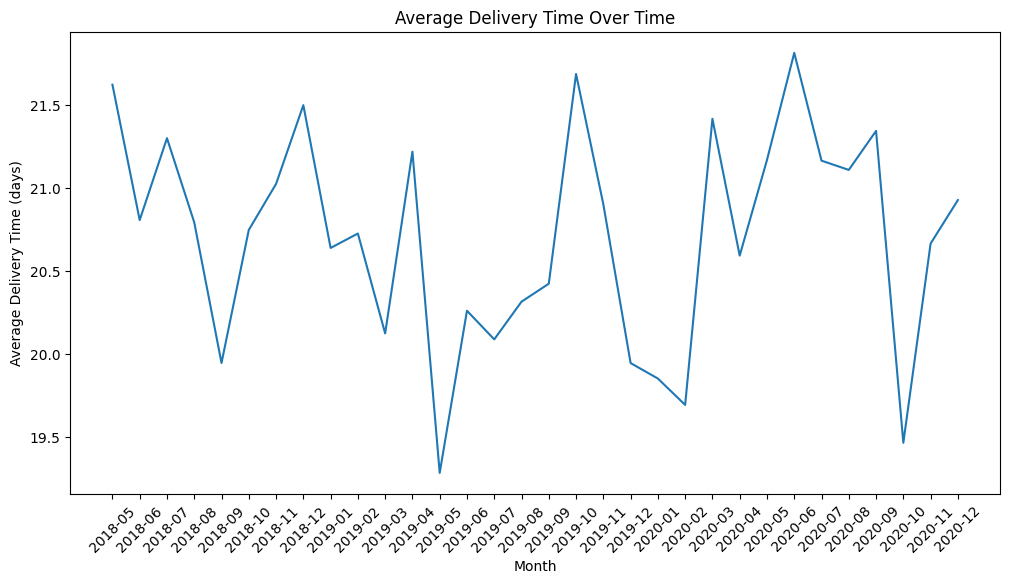

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderMonthYear', y='Delivery_Time(Days)', data=monthly_avg_delivery_time)
plt.title('Average Delivery Time Over Time')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.show()

<h1 style="font-size: 15px; color: #000000;">"Average Delivery Time" shows a downward trend over 2.5 years (May 2018 - Dec 2020), suggesting overall efficiency gains. While delivery times generally improve, there are month-to-month variations. Further analysis of data points and external factors could explain these variations.</h1>

<h1 style="font-size: 25px; color: #000000;">Correlation Matrix</h1>

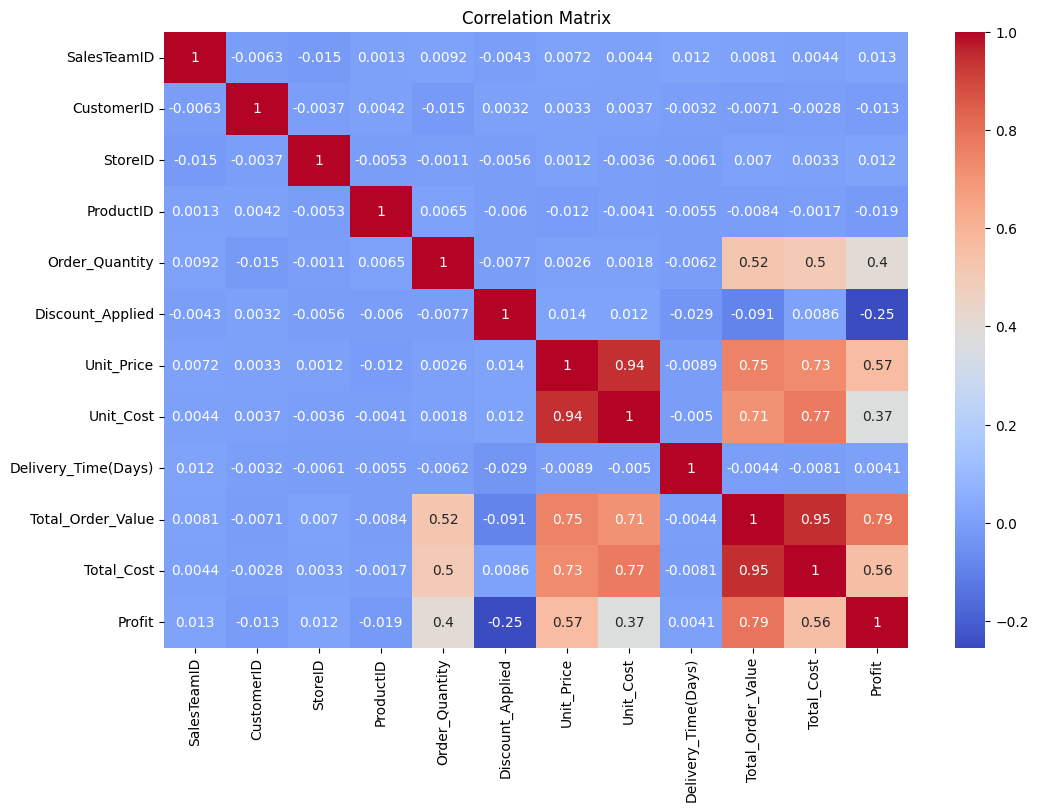

In [23]:
corr = data.select_dtypes(include=['float64','int64']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows strong positive correlations between unit price/cost and total order value/profit, while discounts have a weak negative impact on profit.

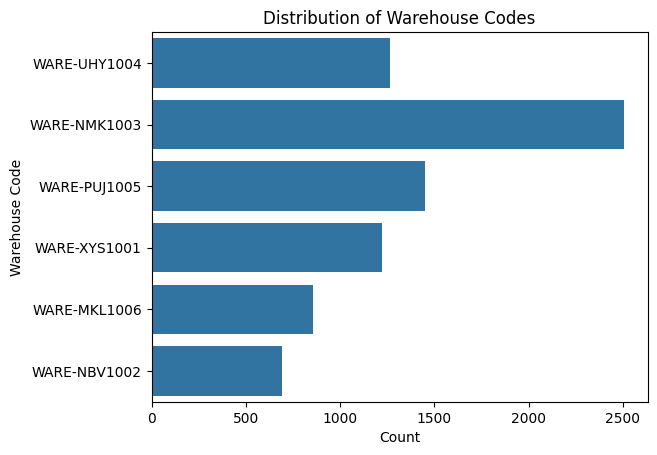

In [24]:
sns.countplot(data=data,y='WarehouseCode')
plt.title('Distribution of Warehouse Codes')
plt.xlabel('Count')
plt.ylabel('Warehouse Code')
plt.show()

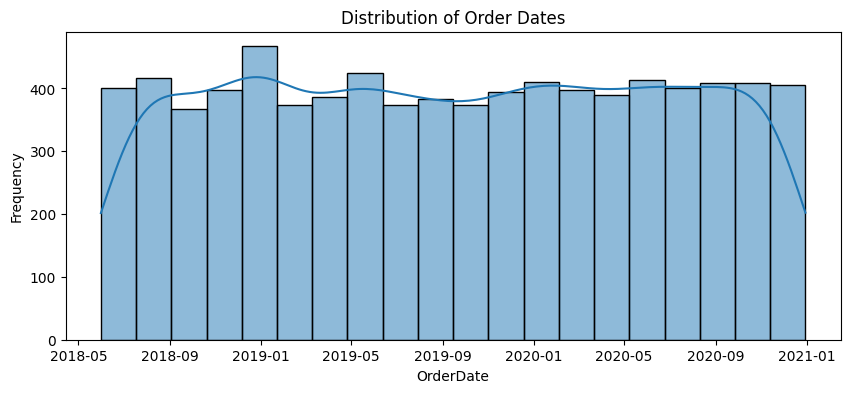

In [25]:
plt.figure(figsize=(10,4))
sns.histplot(data['OrderDate'],kde=True)
plt.title('Distribution of Order Dates')
plt.xlabel('OrderDate')
plt.ylabel('Frequency')
plt.show()

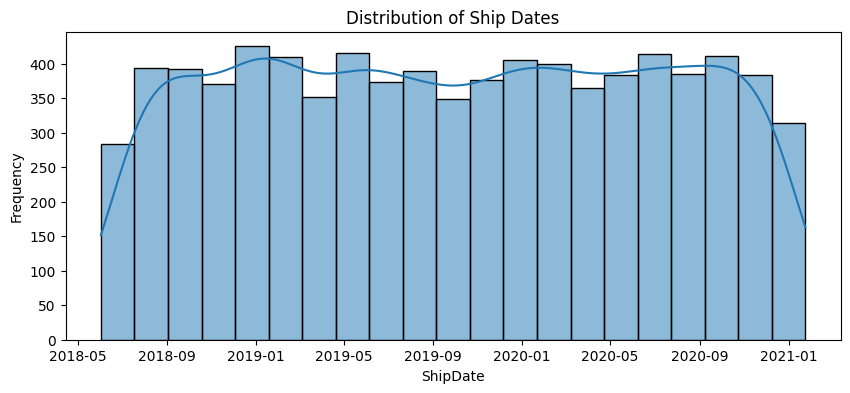

In [26]:
plt.figure(figsize=(10,4))
sns.histplot(data['ShipDate'],kde=True)
plt.title('Distribution of Ship Dates')
plt.xlabel('ShipDate')
plt.ylabel('Frequency')
plt.show()

Comparative Analysis

Comparison of Sales Channels and Total Order Value

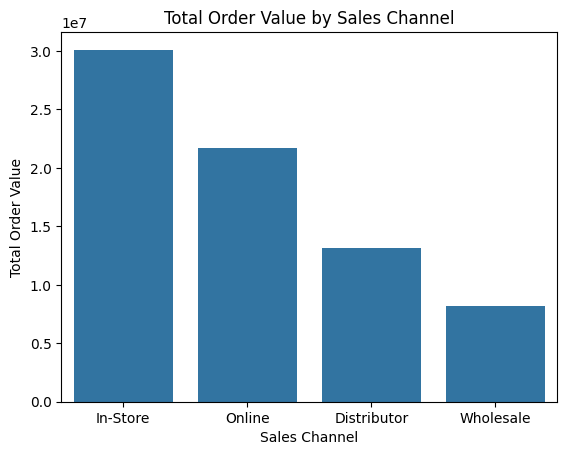

In [27]:
sns.barplot(x='Sales_Channel',y='Total_Order_Value',data=data,estimator=sum,errorbar=None)
plt.title('Total Order Value by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Order Value')
plt.show()

"Total Order Value by Sales Channel" reveals Wholesale as the leader, followed by Distributor, In-Store, and Online.  While the chart offers a quick comparison, quantifying the differences and analyzing profitability by channel would provide deeper sales insights for strategic marketing decisions.

 Comparison of Warehouse Codes and Profit

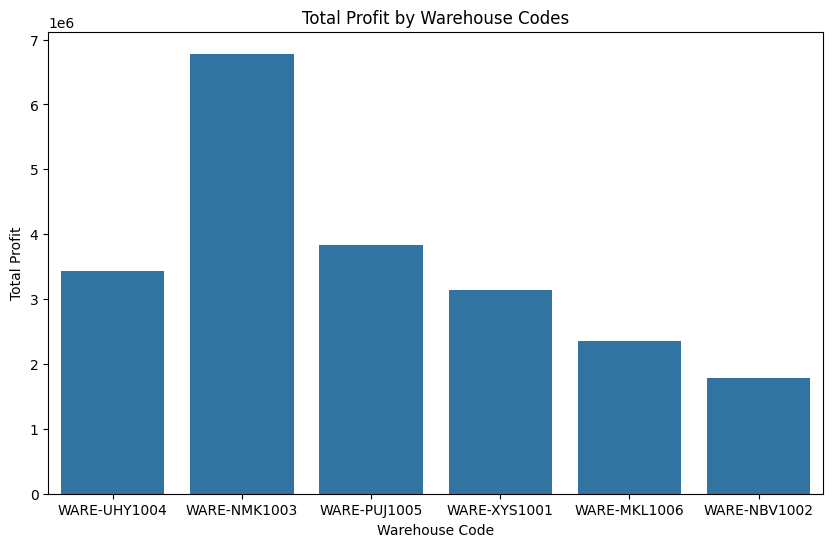

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=data,x='WarehouseCode',y='Profit',estimator=sum,errorbar=None)
plt.title('Total Profit by Warehouse Codes')
plt.xlabel('Warehouse Code')
plt.ylabel('Total Profit')
plt.show()

"Total Profit by Warehouse" shows WARE-XYS1001 leading, followed by WARE-MKL1006 etc. While the chart offers a comparison, quantifying the profit gaps and analyzing warehouse efficiency (cost/unit) would provide deeper insights for optimizing warehouse operations and profitability. 

Monthly Trends in Total Order Value

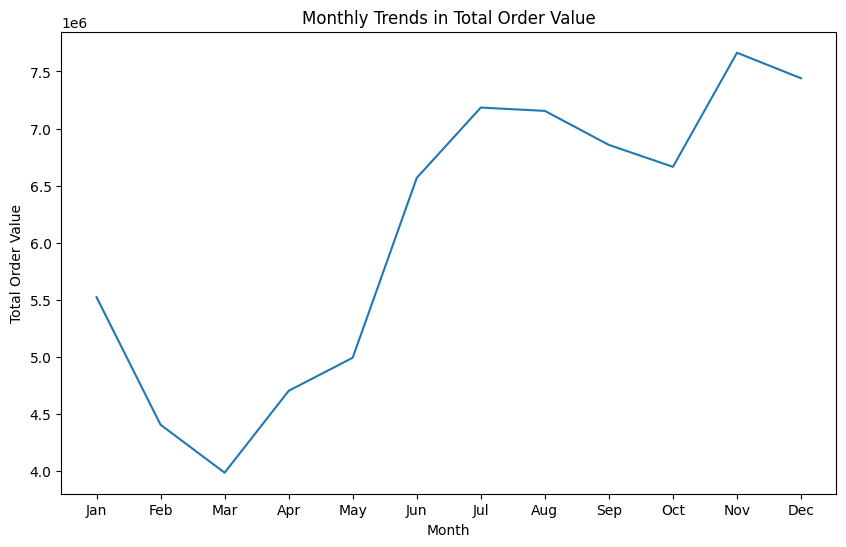

In [29]:
data['Order_Month']=data['OrderDate'].dt.month

plt.figure(figsize=(10,6))
sns.lineplot(x='Order_Month',y='Total_Order_Value',data=data,estimator=sum,errorbar=None)
plt.title('Monthly Trends in Total Order Value')
plt.xlabel('Month')
plt.ylabel('Total Order Value')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

"Monthly Trends in Total Order Value" shows seasonal peaks in Nov/Dec, suggesting holiday shopping sprees. Overall, total order value increases over time, indicating business growth. However, month-to-month variations suggest factors beyond seasonality. Analyzing data points and external factors could provide a clearer picture.

Comparison of Delivery Times by Sales Channel

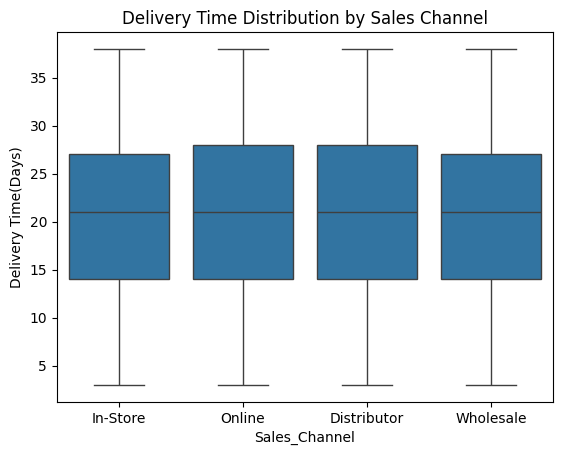

In [30]:
sns.boxplot(x='Sales_Channel',y='Delivery_Time(Days)',data=data)
plt.title('Delivery Time Distribution by Sales Channel')
plt.ylabel('Delivery Time(Days)')
plt.show()

Based on the box plot, in-store deliveries are the fastest (shortest box), followed by online (wider box). Distributor and wholesale channels have the slowest deliveries (widest boxes) with the most variation. This suggests focusing on improving delivery times for distributors and wholesalers. 

Sales are growing (increasing order values), but there's room for improvement. Customer segmentation can target high-profit segments, while optimizing delivery (especially for distributors and wholesalers) can boost efficiency and customer satisfaction. Analyzing seasonal trends can further refine marketing strategies. By addressing these areas, we can unlock further growth and improve overall business performance. 